<a href="https://colab.research.google.com/github/THARAGESHWARAN-SATHYAMOORTHY/JAVASCRIPT/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!pip install keras numpy matplotlib scipy
import keras
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.layers import Layer, Dense, Dropout, Activation, Flatten, Reshape
from tensorflow.keras.utils import to_categorical
from keras import backend as K
from keras import metrics
from tensorflow.keras.layers import Lambda

In [67]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [68]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [69]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [70]:
input_size = 784
hidden_size = 64
output_size = 784

In [71]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

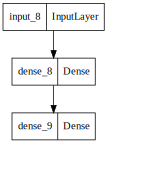

In [72]:
!pip install pydot graphviz
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [10]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))


Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.0442 - val_loss: 0.0221
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0173 - val_loss: 0.0131
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0109 - val_loss: 0.0087
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0078 - val_loss: 0.0066
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0062 - val_loss: 0.0055


313/313 [==============================] - 2s 5ms/step


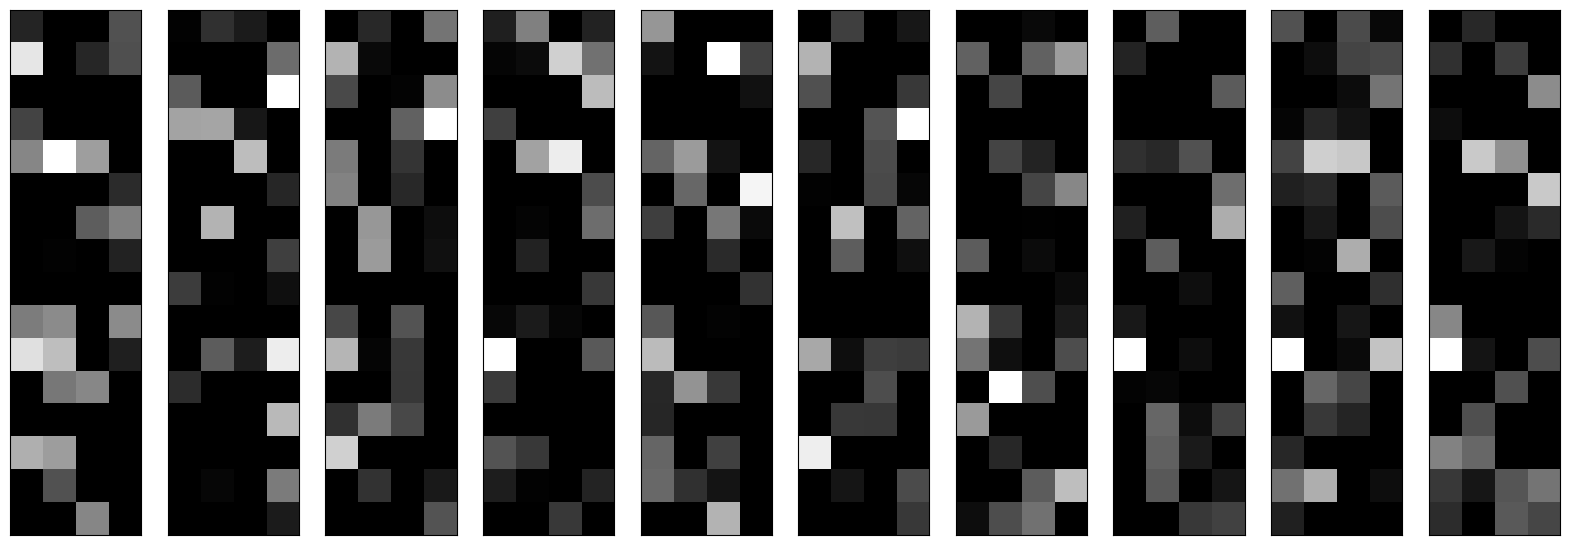

In [73]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
decoded_imgs = autoencoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


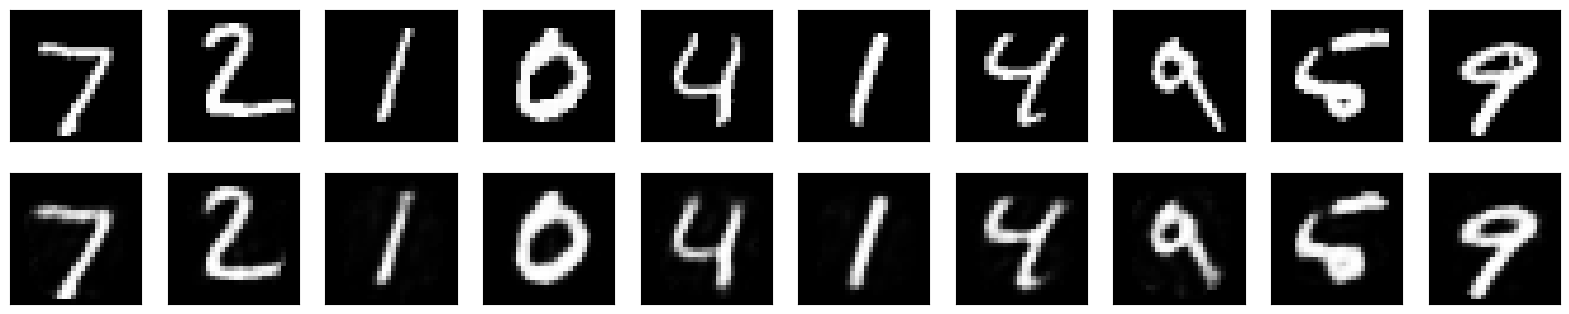

In [13]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

dict_keys(['loss', 'val_loss'])


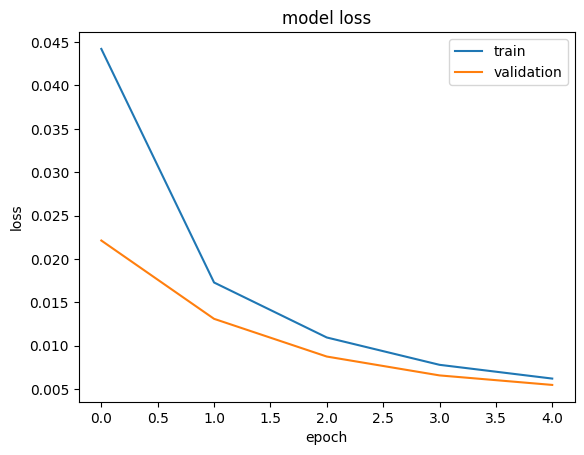

In [14]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Epoch 1/3
469/469 [==============================] - 76s 158ms/step - loss: -495.5559 - val_loss: -503.1299
Epoch 2/3
469/469 [==============================] - 69s 148ms/step - loss: -496.0743 - val_loss: -503.4424
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


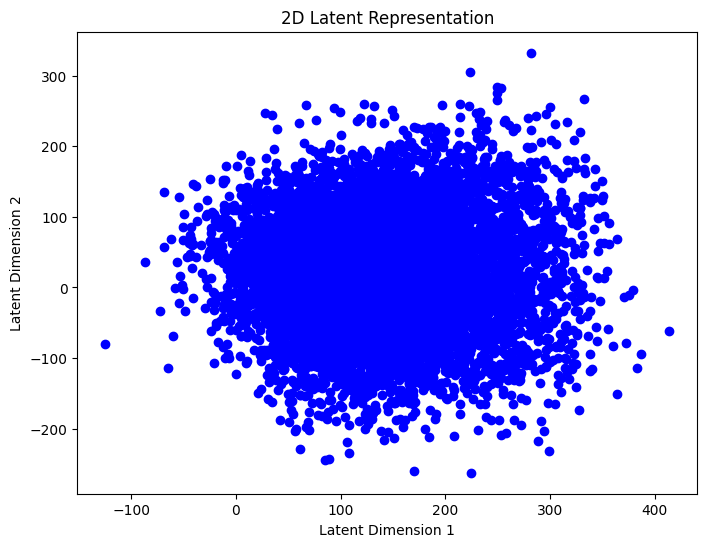

In [117]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
latent_dim = 7  # Set the desired dimensionality of the latent representation

# Define the encoder model
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
z = Dense(latent_dim)(h)  # Map to a 2D latent space

encoder = Model(x, z)

# Compile the encoder model (not necessary, but it's a good practice)
encoder.compile(optimizer='adam', loss='mse')

# Fit the encoder model on your data (X_train)
autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Obtain the 2D latent representation for your test data
latent_representation = encoder.predict(X_test)

# Visualize the 2D latent representation
plt.figure(figsize=(8, 6))
plt.scatter(latent_representation[:, 0], latent_representation[:, 1], c='blue')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('2D Latent Representation')
plt.show()



In [15]:
input_size = 784
hidden_size = 128
code_size = 64

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

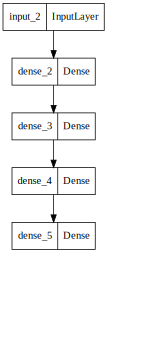

In [16]:
!pip install pydot graphviz
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [17]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))


Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 0.0410 - val_loss: 0.0191
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0156 - val_loss: 0.0126
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0114 - val_loss: 0.0098
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0094 - val_loss: 0.0085
Epoch 5/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0083 - val_loss: 0.0077


In [18]:
decoded_imgs = autoencoder.predict(X_test)

313/313 [==============================] - 1s 3ms/step


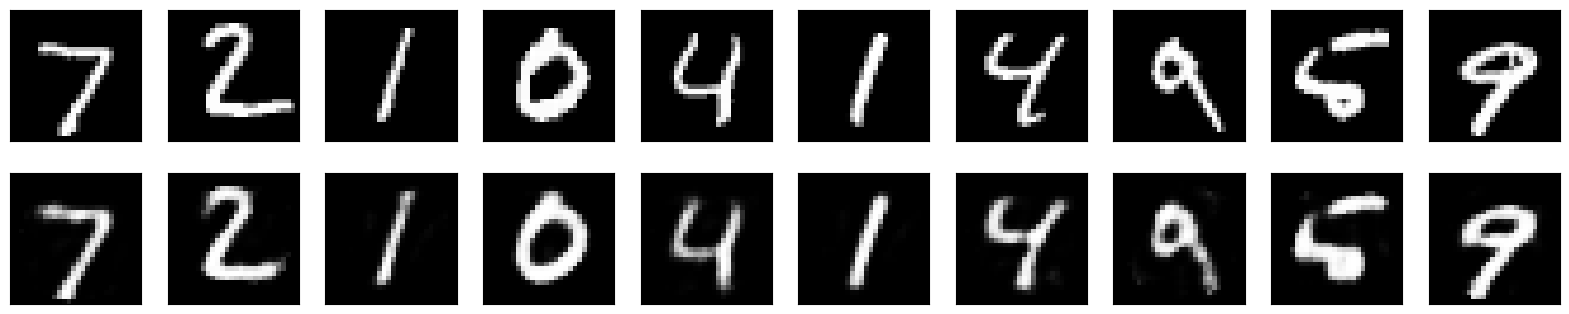

In [19]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

dict_keys(['loss', 'val_loss'])


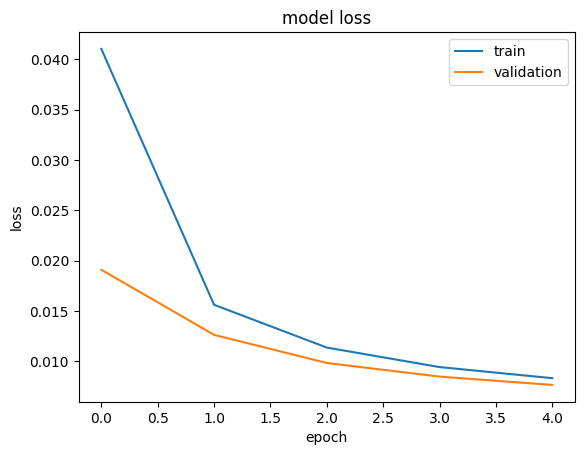

In [20]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [83]:

from tensorflow.keras.utils import to_categorical

nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [84]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

x = Input(shape=(28, 28, 1))

# Encoder
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)

# Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up3)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.6 MB/s eta 0:00:00


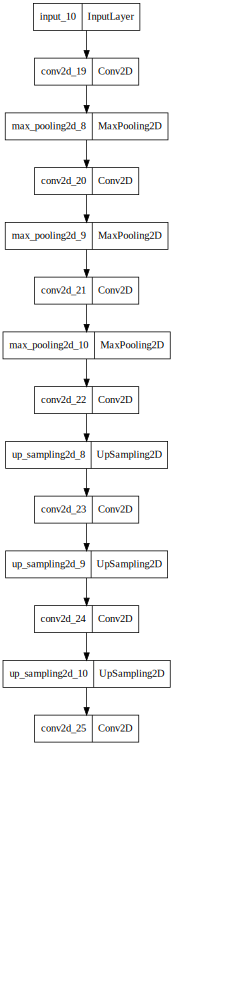

In [85]:
!pip install pydot graphviz
!pip install ipython
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [86]:
epochs = 3
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/3
469/469 [==============================] - 88s 179ms/step - loss: 0.7053 - val_loss: 0.7032
Epoch 2/3
469/469 [==============================] - 67s 144ms/step - loss: 0.7013 - val_loss: 0.6994
Epoch 3/3
469/469 [==============================] - 66s 141ms/step - loss: 0.6976 - val_loss: 0.6957


In [88]:
decoded_imgs = autoencoder.predict(X_test)

313/313 [==============================] - 4s 12ms/step


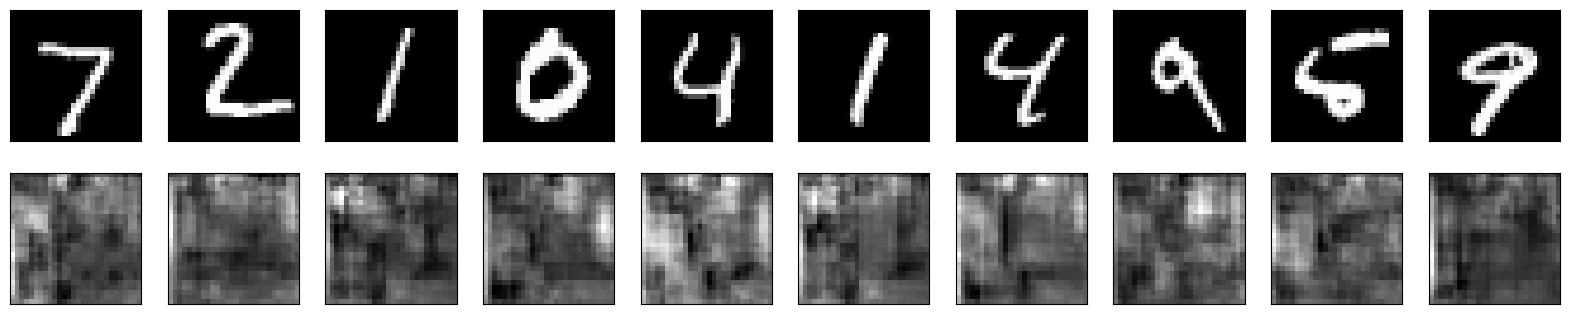

In [89]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

dict_keys(['loss', 'val_loss'])


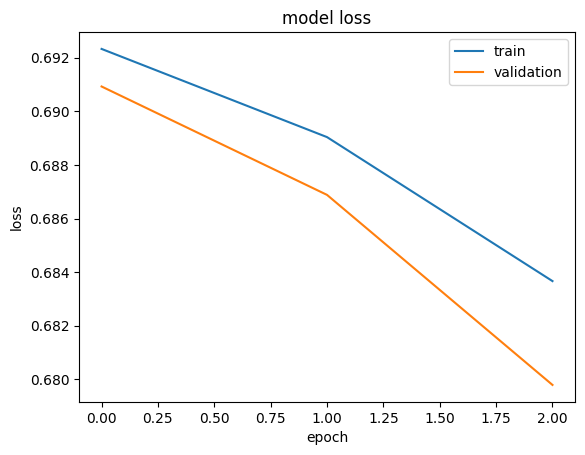

In [82]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [38]:
input_size = 784
hidden_size = 32
output_size = 784

In [40]:
from keras import regularizers
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu', activity_regularizer=regularizers.l1(10e-5))(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

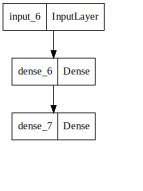

In [41]:
!pip install pydot graphviz
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [59]:
epochs = 3
batch_size = 128

history = autoencoder.fit(X_train_noisy, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_noisy, X_test))


Epoch 1/3
469/469 [==============================] - 123s 262ms/step - loss: 0.5166 - val_loss: 0.5053
Epoch 2/3
469/469 [==============================] - 126s 269ms/step - loss: 0.4964 - val_loss: 0.4950
Epoch 3/3
469/469 [==============================] - 121s 258ms/step - loss: 0.4866 - val_loss: 0.4854


In [60]:
decoded_imgs = autoencoder.predict(X_test)


313/313 [==============================] - 5s 17ms/step


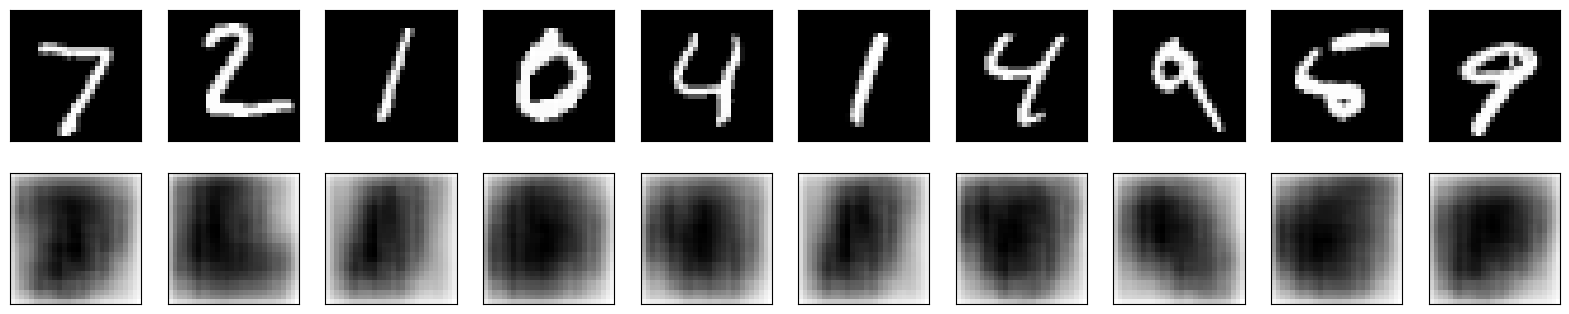

In [61]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


dict_keys(['loss', 'val_loss'])


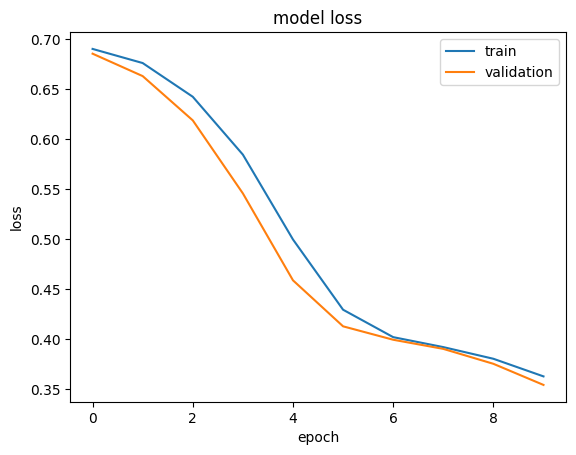

In [50]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [51]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

In [52]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [53]:
x = Input(shape=(28, 28, 1))

# Encoder
conv1_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
h = MaxPooling2D((2, 2), padding='same')(conv1_2)


# Decoder
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


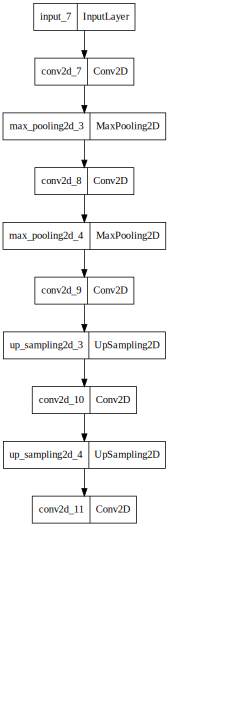

In [54]:
!pip install pydot graphviz
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [55]:
epochs = 3
batch_size = 128

history = autoencoder.fit(X_train_noisy, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_noisy, X_test))


Epoch 1/3
469/469 [==============================] - 139s 290ms/step - loss: 0.6850 - val_loss: 0.6749
Epoch 2/3
469/469 [==============================] - 130s 278ms/step - loss: 0.6581 - val_loss: 0.6358
Epoch 3/3
469/469 [==============================] - 123s 262ms/step - loss: 0.5933 - val_loss: 0.5465


In [56]:
decoded_imgs = autoencoder.predict(X_test_noisy)

313/313 [==============================] - 5s 16ms/step


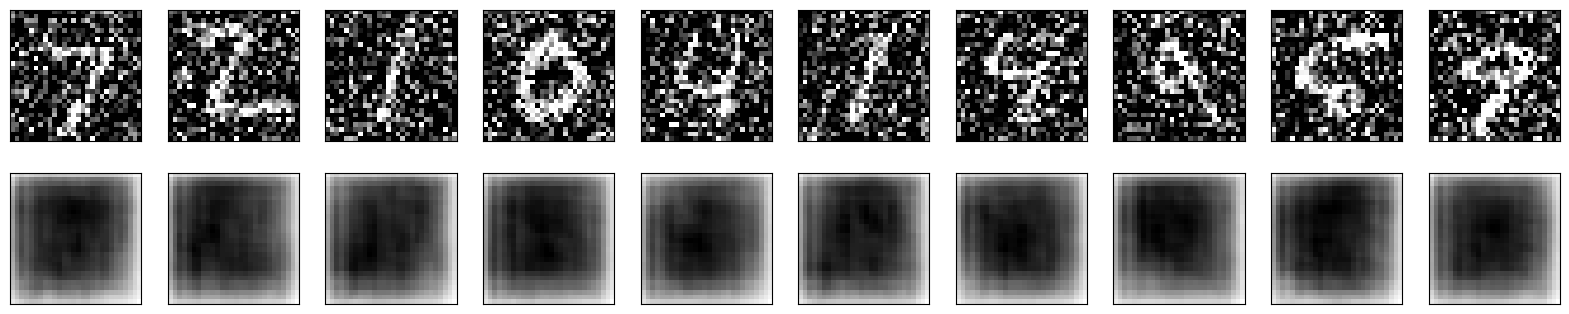

In [57]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

dict_keys(['loss', 'val_loss'])


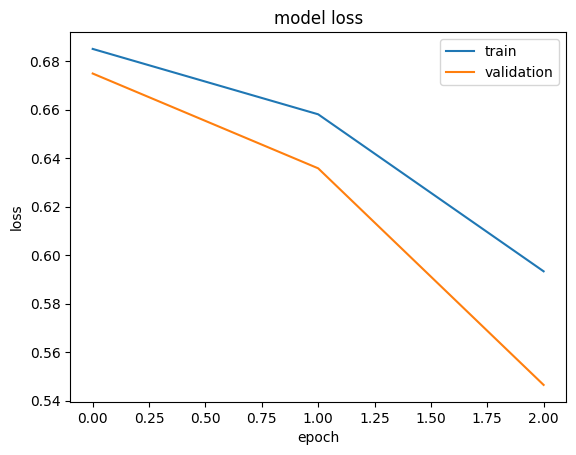

In [58]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()